In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

In [32]:
class Leath:
    def __init__(self, n=80, p=0.6):
        self.n = n
        self.p = p
        self.perimeter = set()
        self.dead = set()
        # Mark out of bounds as dead
        for i in [-1, n]:
            for j in range(0, n):
                self.dead.add((i, j))
        for j in [-1, n]:
            for i in range(0, n):
                self.dead.add((i, j))
        seed = (n // 2, n // 2)
        self.cluster = set([seed])
        self.world = np.zeros((n, n), dtype=np.int8)
        self.world[seed] = 2
        self.add_perimeter(seed)

    def add_perimeter(self, pt):
        """
        Given a point pt (tuple), add to perimeter all 4 neighbors that are not
        in cluster.
        """
        nn = [
            (pt[0] + i, pt[1] + j)
            for i, j in zip([1, -1, 0, 0], [0, 0, 1, -1])
        ]
        for p in nn:
            if (
                p not in self.cluster
                and p not in self.perimeter
                and p not in self.dead
            ):
                self.perimeter.add(p)

    def grow_cluster(self):
        """
        Iterate through each point in perimeter, if uniform random [0, 1) is
        less than p, add perimeter point to cluster. Else, mark point as
        inaccessible. Do something to keep cluster from leaving domain.
        """
        fate = np.random.rand(len(self.perimeter)) <= self.p
        new_cluster_pts = []
        new_dead_pts = []
        for pt, f in zip(self.perimeter, fate):
            if f:
                new_cluster_pts.append(pt)
            else:
                new_dead_pts.append(pt)
        self.perimeter = set()
        for pt in new_dead_pts:
            self.dead.add(pt)
            self.world[pt] = 1
        for pt in new_cluster_pts:
            self.cluster.add(pt)
            self.world[pt] = 2
            self.add_perimeter(pt)


class LeathAnimation:
    def __init__(self, sim, interval, max_iter):
        self.sim = sim
        self.fig = plt.figure(figsize=(10, 10))
        self.im = None
        self.ani = None
        self.interval = interval
        self.max_iter = max_iter

    def init(self):
        self.im = plt.imshow(
            self.sim.world, interpolation="none", animated=True, cmap="gray"
        )
        plt.axis("off")
        return (self.im,)

    def update(self, *args):
        self.sim.grow_cluster()
        self.im.set_data(self.sim.world)
        return (self.im,)

    def run(self):
        self.ani = FuncAnimation(
            self.fig,
            self.update,
            frames=self.max_iter,
            init_func=self.init,
            interval=self.interval,
            blit=True,
        )
        return HTML(self.ani.to_html5_video())

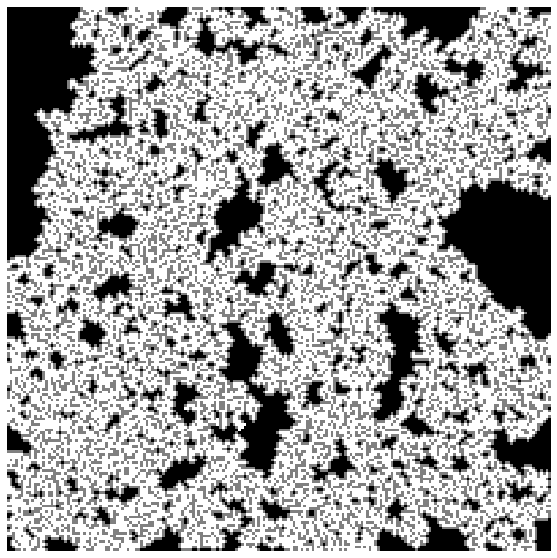

In [33]:
LeathAnimation(Leath(200, 0.6), 100, 400).run()